Assignment 3 - Part 1
---

By: Bilal Ahmed

In [144]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [145]:
# Creating dataframe from csv file
df = pd.read_csv('StudentsPerformance.csv')

# overview of the data
df.head()#getting the first 5 rows of data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [146]:
#checking number of rows and columns
df.shape

(1000, 8)

There are 1000 rows with 8 columns

In [147]:
# examining the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [148]:
# checking for any missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null/missing values in the dataset

In [149]:
#checking the unique elements in each attribute
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [150]:
# Count of duplicated rows
print(df.duplicated().sum())

0


There are no duplicated rows 

In [151]:
exclude_cols = ['writing score','reading score','math score']  # Column I do not want in the loop below

for col in df.columns:
    if col in exclude_cols:
        continue  


    print(f"\n--- Value counts (%): {col} ---")
    percent = df[col].value_counts(normalize=True, dropna=False) * 100
    print(percent.round(2).astype(str) + '%')


--- Value counts (%): gender ---
female    51.8%
male      48.2%
Name: gender, dtype: object

--- Value counts (%): race/ethnicity ---
group C    31.9%
group D    26.2%
group B    19.0%
group E    14.0%
group A     8.9%
Name: race/ethnicity, dtype: object

--- Value counts (%): parental level of education ---
some college          22.6%
associate's degree    22.2%
high school           19.6%
some high school      17.9%
bachelor's degree     11.8%
master's degree        5.9%
Name: parental level of education, dtype: object

--- Value counts (%): lunch ---
standard        64.5%
free/reduced    35.5%
Name: lunch, dtype: object

--- Value counts (%): test preparation course ---
none         64.2%
completed    35.8%
Name: test preparation course, dtype: object


In [152]:
#Descriptive Statistics
numerical_cols = df.select_dtypes(include=['number'])
print("Descriptive Statistics for Numerical Columns:")
display(numerical_cols.describe())


Descriptive Statistics for Numerical Columns:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


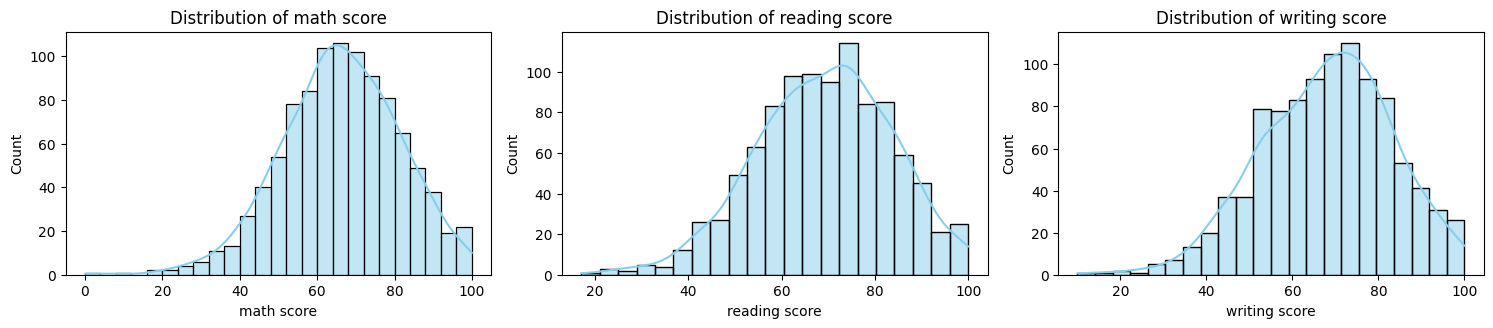

In [153]:
#Data Distribution Visualizations
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


Value Counts for gender:
female    518
male      482
Name: gender, dtype: int64


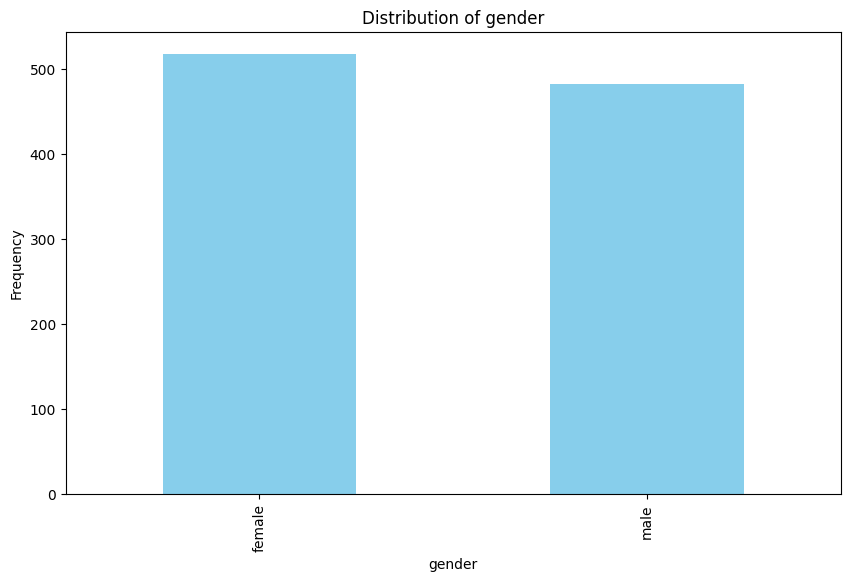


Value Counts for race/ethnicity:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


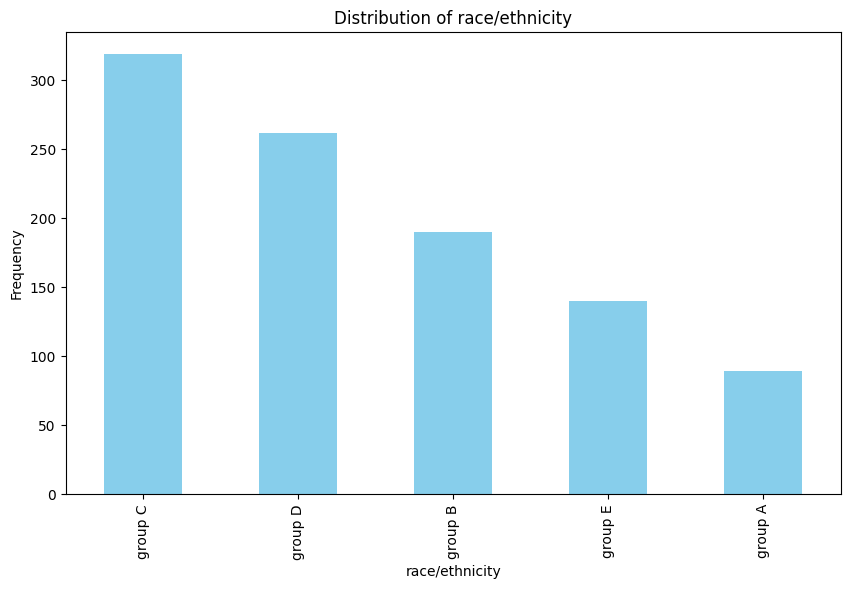


Value Counts for parental level of education:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


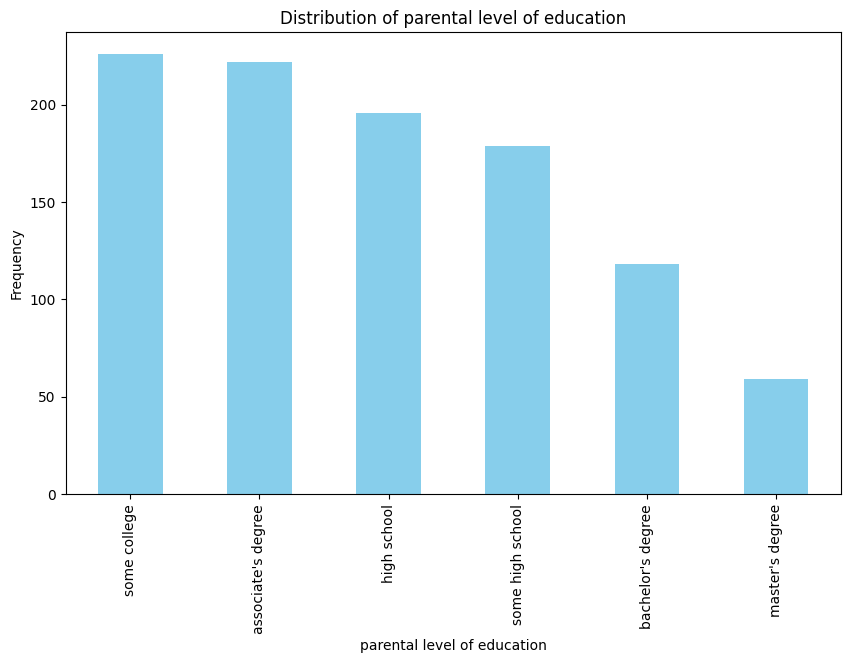


Value Counts for lunch:
standard        645
free/reduced    355
Name: lunch, dtype: int64


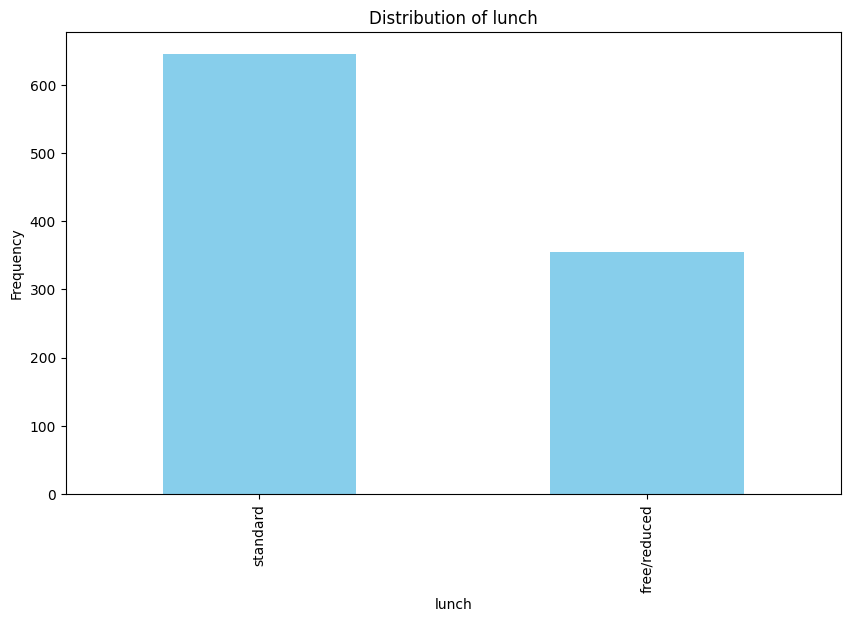


Value Counts for test preparation course:
none         642
completed    358
Name: test preparation course, dtype: int64


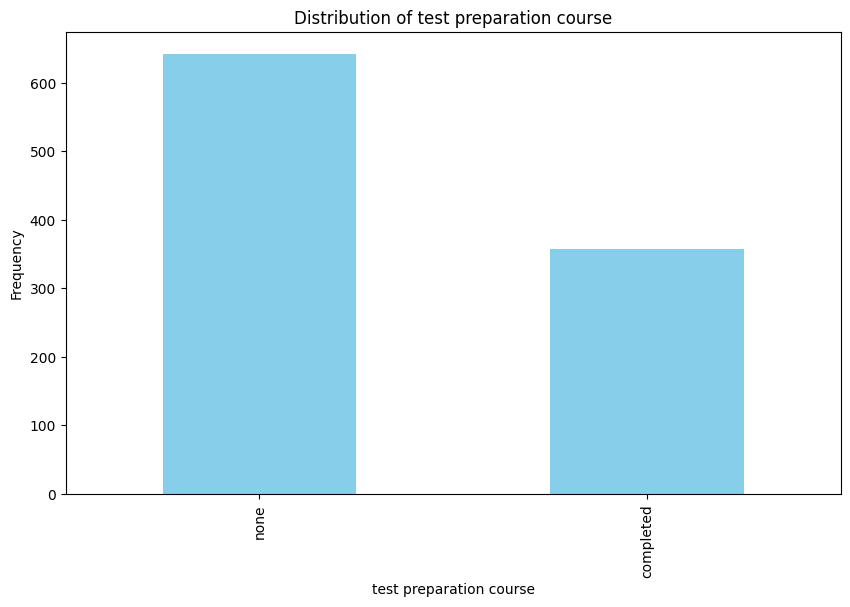

In [154]:
#Categorical Analysis
categorical_cols = df.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))  # Adjust figure size
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Outlier detection

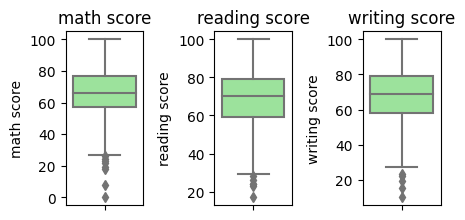

In [155]:
numerical_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(5, 10, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()


I can see outliers in numerical columns above, however, I have decided to keep them as based on the descriptive statistics above, the scores seem realistic and logical

Correlation analysis

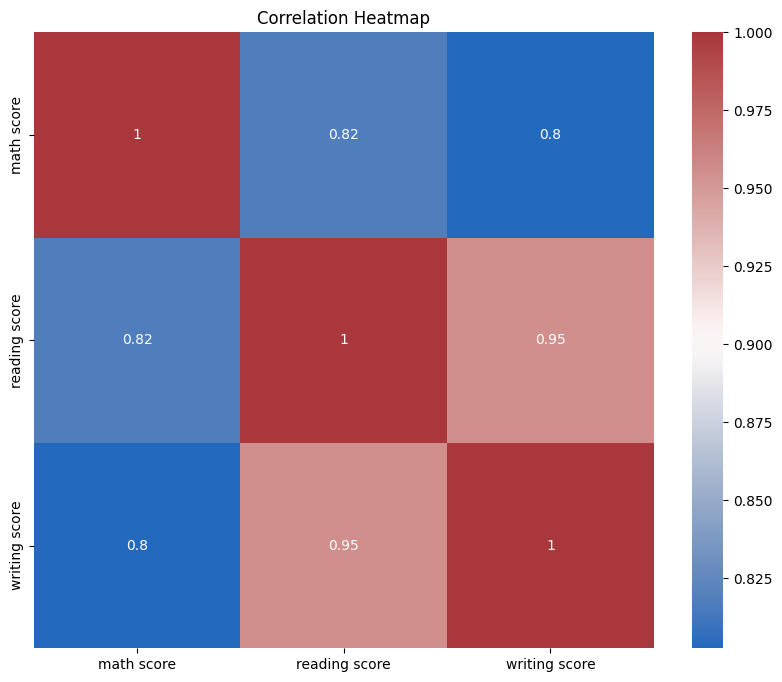

In [156]:
# correlation  between any two variables'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap')
plt.show()

Alll numeric colums are highly correlated with each other.

Encoding

In [157]:
# encoding "gender" Column
df.replace({'gender':{'male':0,'female':1}},inplace=True)

# encoding "race/ethnicity" Column
df.replace({'race/ethnicity':{'group C':0,'group D':1,'group B':2,'group E':3,'group A':4}},inplace=True)

# encoding "parental level of education" Column
df.replace({'parental level of education':{'some college':0,"associate's degree":1,'high school':2,'some high school':3,"bachelor's degree":4,"master's degree":5}},inplace=True)

# encoding "lunch" Column
df.replace({'lunch':{'standard':0,'free/reduced':1}},inplace=True)

# encoding "test preparation course" Column
df.replace({'test preparation course':{'none':0,'completed':1}},inplace=True)

In [158]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,2,4,0,0,72,72,74
1,1,0,0,0,1,69,90,88
2,1,2,5,0,0,90,95,93
3,0,4,1,1,0,47,57,44
4,0,0,0,0,0,76,78,75


Evaluation Table

In [159]:
Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['R2 Test', 'R2 Adjusted', 'MAE', 'MSE', 'RMSE'])
Evaluation_Results.index=['Multilinear Regression (MR)','MR without reading', 'Polynomial Regression (PR)']

Multilinear regression

In [160]:
X = df.drop(columns=['math score'])
y = df['math score']

In [161]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and test sets...


In [162]:
X_train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
29,1,1,5,0,0,70,75
535,1,0,4,1,1,83,83
695,1,1,0,1,0,89,86
557,0,0,5,1,0,67,66
836,0,3,2,0,0,64,57


In [163]:
y_train.head()

29     62
535    66
695    79
557    61
836    73
Name: math score, dtype: int64

In [164]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [165]:
print("Training Linear Regression model on scaled features...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Training Linear Regression model on scaled features...


LinearRegression()

In [166]:
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'reading score', 'writing score'],
      dtype='object')

In [167]:
model.intercept_

66.49625

In [168]:
model.coef_

array([-6.43262335,  1.17716468, -0.50844126, -1.75271659, -1.45720524,
        4.02648076, 10.29804807])

We will later in the code drop reading score as it is highly correlated with another feature writing score and retaining writing score because it has larger coefficient than reading score

In [169]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [170]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[0]['R2 Test']= r2 
Evaluation_Results.iloc[0]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[0]['MAE']= mae 
Evaluation_Results.iloc[0]['MSE']= mse
Evaluation_Results.iloc[0]['RMSE']= rmse


✅ R² Score: 0.8735
✅ Adjusted R² Score: 0.8689
📉 Mean Squared Error (MSE): 30.7726
📉 Mean Absolute Error (MAE): 4.2838
📉 Root Mean Squared Error (RMSE): 5.5473


In [171]:
#Evaluation_Results

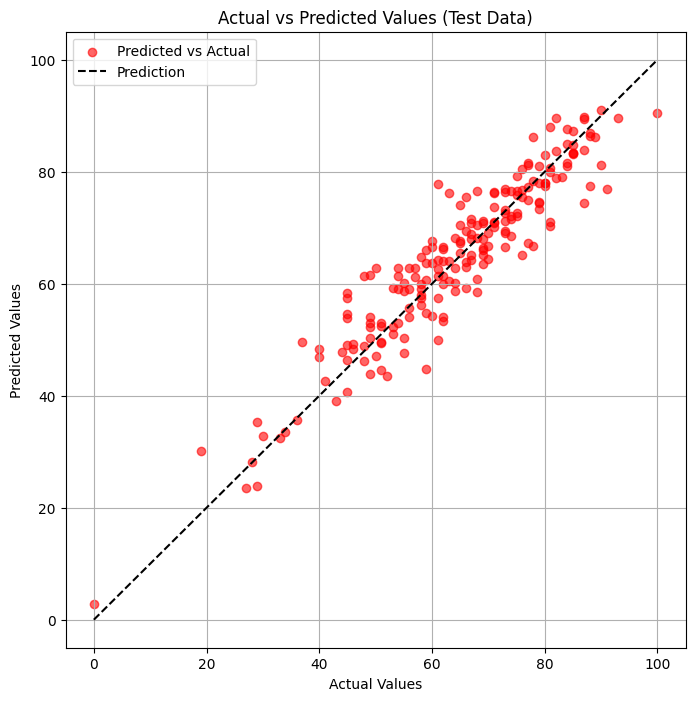

In [172]:
# visualizing the true values and prediction values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Prediction')

plt.title("Actual vs Predicted Values (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [173]:
#dropping reading score column
X = df.drop(columns=['math score','reading score'])

In [174]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score
0,1,2,4,0,0,74
1,1,0,0,0,1,88
2,1,2,5,0,0,93
3,0,4,1,1,0,44
4,0,0,0,0,0,75


In [175]:
y = df['math score']

In [176]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and test sets...


In [177]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [178]:
print("Training Linear Regression model on scaled features...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Training Linear Regression model on scaled features...


LinearRegression()

In [179]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [180]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[1]['R2 Test']= r2 
Evaluation_Results.iloc[1]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[1]['MAE']= mae 
Evaluation_Results.iloc[1]['MSE']= mse
Evaluation_Results.iloc[1]['RMSE']= rmse

✅ R² Score: 0.8606
✅ Adjusted R² Score: 0.8563
📉 Mean Squared Error (MSE): 33.9169
📉 Mean Absolute Error (MAE): 4.4915
📉 Root Mean Squared Error (RMSE): 5.8238


In [181]:
#Evaluation_Results

We have seen that R2 as well as R2 adjusted has reduced from before. It might be the case that writing and reading scores were perfectly coorelated and that is why when we removed one feature, the overalll model accuracy dropped. 

Polynomial Regression

In [182]:
from sklearn.preprocessing import PolynomialFeatures

In [183]:
X = df.drop(columns=['math score'])
y = df['math score']

In [184]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and test sets...


In [185]:
poly = PolynomialFeatures(degree=2) #here if we change degree from 2 to 3, we will get 3 more features in addition to original column.

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

To see transformed features

In [186]:
# first row of original DataFrame correctly
print("Original Row:")
print(X_train.iloc[0])

#first row of transformed array
feature_names = poly.get_feature_names_out(X_train.columns)
poly_df = pd.DataFrame(X_train_trans, columns=feature_names)
print(poly_df.iloc[0])

Original Row:
gender                          1
race/ethnicity                  1
parental level of education     5
lunch                           0
test preparation course         0
reading score                  70
writing score                  75
Name: 29, dtype: int64
1                                                         1.0
gender                                                    1.0
race/ethnicity                                            1.0
parental level of education                               5.0
lunch                                                     0.0
test preparation course                                   0.0
reading score                                            70.0
writing score                                            75.0
gender^2                                                  1.0
gender race/ethnicity                                     1.0
gender parental level of education                        5.0
gender lunch                               

In [187]:
model = LinearRegression()
model.fit(X_train_trans, y_train)

LinearRegression()

In [188]:
#y_train_pred = model.predict(X_train_trans)
y_test_pred = model.predict(X_test_trans)

In [189]:
# Evaluation metrics
n = X_test_trans.shape[0]
p = X_test_trans.shape[1]

# Evaluate on test data (actual vs predicted)
r2 = r2_score(y_test, y_test_pred)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[2]['R2 Test']= r2 
Evaluation_Results.iloc[2]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[2]['MAE']= mae 
Evaluation_Results.iloc[2]['MSE']= mse
Evaluation_Results.iloc[2]['RMSE']= rmse

✅ R² Score: 0.8752
✅ Adjusted R² Score: 0.8476
📉 Mean Squared Error (MSE): 30.3669
📉 Mean Absolute Error (MAE): 4.2955
📉 Root Mean Squared Error (RMSE): 5.5106


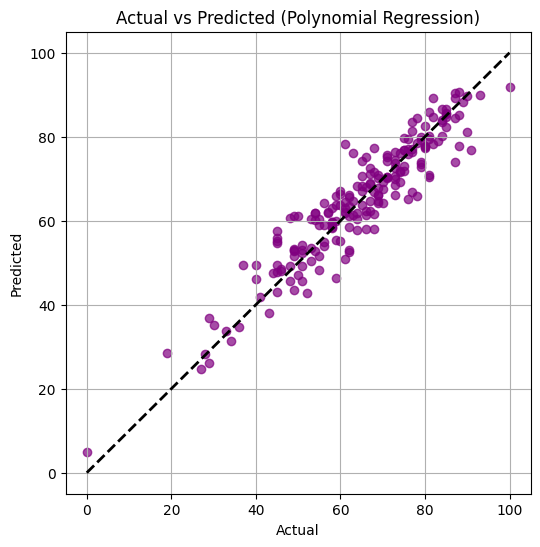

In [190]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.grid(True)
plt.show()

I set the degree to 2 as we already saw good results in multilinear regression as well as polynomial regression. If we increase the degree to 3 it might overfit the data as overfitting happens by increasing degree. 

Final summary of models

In [191]:
Evaluation_Results

,R2 Test,R2 Adjusted,MAE,MSE,RMSE
Multilinear Regression (MR),0.873540,0.868929,4.283769,30.772645,5.547310
MR without reading,0.860618,0.856285,4.491526,33.916904,5.823822
Polynomial Regression (PR),0.875207,0.847646,4.295529,30.366871,5.510614


According to the table above, we can see that multilinear regression has the least amount of error value for MAE. We will be using MAE as our data had outliers and it is good metric to look out for when data has outliers.